##PREVISÃO DE INADIMPLÊNCIA COM USO DE DIFERENTES MODELOS DE *MACHINE LEARNING*
Grupo:
Mayara Daher de Paula, 
Paula da Silva Nogueira,
Vinícius Feijó Cordeiro

**DESCRIÇÃO DOS DADOS:**

**LIMIT_BAL:** Valor do crédito concedido (dólar NT): inclui tanto o crédito ao consumidor individual quanto o crédito familiar (suplementar).

**SEX:** Gênero (1 = masculino; 2 = feminino).

**EDUCATION:** Nível de escolaridade (1 = pós-graduação; 2 = graduação; 3 = ensino médio; 4 = outros).

**MARRIAGE:** Estado civil (1 = casado; 2 = solteiro; 3 = outros).

**AGE:** Idade (ano).

**PAY_0:** Histórico de pagamentos anteriores: status do pagamento em setembro de 2005.
(-1 = pago devidamente; 1 = atraso no pagamento por um mês; 2 = atraso no pagamento por dois meses; . . .; 8 = atraso no pagamento por oito meses; 9 = atraso no pagamento por nove meses e acima de 9 meses)

**PAY_2 ... PAY_6:** Histórico de pagamentos anteriores: status do pagamento de agosto de 2005 à abril de 2005 (retroativo).
(-1 = pago devidamente; 1 = atraso no pagamento por um mês; 2 = atraso no pagamento por dois meses; . . .; 8 = atraso no pagamento por oito meses; 9 = atraso no pagamento por nove meses e acima de 9 meses)

**BILL_AMT1 ... BILL_AMT6:** Valor do extrato da conta (dólar NT) de setembro de 2005 à abril de 2005 (retroativo).

**PAY_AMT1 ... PAY_AMT6:** Valor do pagamento anterior (NT dólar) - setembro de 2005 à abril de 2005 (retroativo).

##Importar as bibliotecas

In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##Importar a base de dados para o Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Inadimplencia_cartao/default of credit card clients.xlsx') 

##Processamento/Tratamento de dados

Tamanho da base: 25 colunas e 30000 observações

In [ ]:
df.shape

(30000, 25)

10 linhas iniciais da base de dados

In [ ]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


Nome das colunas

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Renomear os títulos das colunas para português

In [ ]:
df = df.rename(columns={'LIMIT_BAL': 'Crédito concedido', 'SEX': 'Gênero', 
                         'EDUCATION': 'Nível de escolaridade', 'MARRIAGE': 'Estado civil', 'AGE': 'Idade', 
                         'PAY_0': 'Histórico pag set/2005', 'PAY_2': 'Histórico pag ago/2005', 'PAY_3': 'Histórico pag jul/2005',
                         'PAY_4': 'Histórico pag jun/2005', 'PAY_5': 'Histórico pag mai/2005', 'PAY_6': 'Histórico pag abr/2005', 
                         'BILL_AMT1': 'Valor extrato set/2005', 'BILL_AMT2': 'Valor extrato ago/2005', 'BILL_AMT3': 'Valor extrato jul/2005',
                         'BILL_AMT4': 'Valor extrato jun/2005', 'BILL_AMT5': 'Valor extrato mai/2005', 'BILL_AMT6': 'Valor extrato abr/2005', 
                         'PAY_AMT1': 'Valor pag set/2005', 'PAY_AMT2': 'Valor pag ago/2005', 'PAY_AMT3': 'Valor pag jul/2005',
                         'PAY_AMT4': 'Valor pag jun/2005', 'PAY_AMT5': 'Valor pag mai/2005', 'PAY_AMT6': 'Valor pag abr/2005', 
                         'default payment next month': 'Inadimplência'})

Informações da base de dados:
*   Não há valores ausentes
*   Os dados são do tipo Inteiro

In [ ]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   ID                      30000 non-null  int64
 1   Crédito concedido       30000 non-null  int64
 2   Gênero                  30000 non-null  int64
 3   Nível de escolaridade   30000 non-null  int64
 4   Estado civil            30000 non-null  int64
 5   Idade                   30000 non-null  int64
 6   Histórico pag set/2005  30000 non-null  int64
 7   Histórico pag ago/2005  30000 non-null  int64
 8   Histórico pag jul/2005  30000 non-null  int64
 9   Histórico pag jun/2005  30000 non-null  int64
 10  Histórico pag mai/2005  30000 non-null  int64
 11  Histórico pag abr/2005  30000 non-null  int64
 12  Valor extrato set/2005  30000 non-null  int64
 13  Valor extrato ago/2005  30000 non-null  int64
 14  Valor extrato jul/2005  30000 non-null  int64
 15  Valor extrato jun/2

Confirmação através da figura que não há valores ausentes

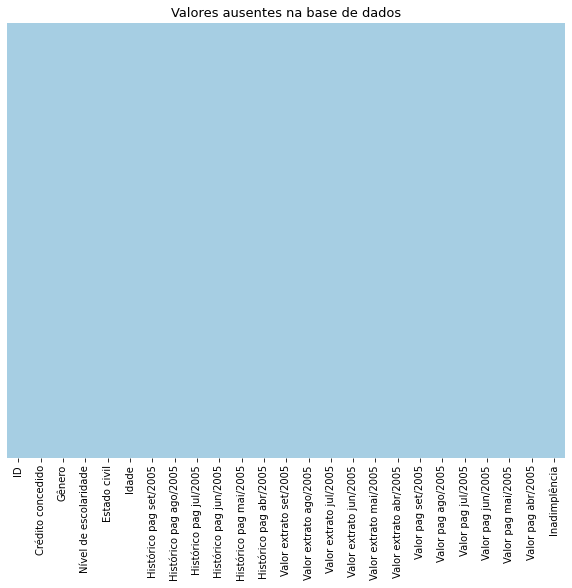

In [ ]:
plt.figure(figsize=(10,8))

sns.heatmap(df.isnull(), cbar=False, cmap='Paired', yticklabels=False)
plt.title('Valores ausentes na base de dados', size=13)

plt.show()

Checar valores únicos das variáveis

In [ ]:
print('Gênero' + str(sorted(df['Gênero'].unique())))
print('Nível de escolaridade' + str(sorted(df['Nível de escolaridade'].unique())))
print('Estado civil' + str(sorted(df['Estado civil'].unique())))
print('Histórico pag set/2005' + str(sorted(df['Histórico pag set/2005'].unique())))
print('Valor extrato set/2005' + str(sorted(df['Valor extrato set/2005'].unique())))
print('Valor pag set/2005' + str(sorted(df['Valor pag set/2005'].unique())))
print('Inadimplência' + str(sorted(df['Inadimplência'].unique())))

Gênero[1, 2]
Nível de escolaridade[0, 1, 2, 3, 4, 5, 6]
Estado civil[0, 1, 2, 3]
Histórico pag set/2005[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Valor extrato set/2005[-165580, -154973, -15308, -14386, -11545, -10682, -9802, -9095, -8187, -7438, -7082, -6676, -6029, -6028, -6027, -5700, -5684, -5478, -4894, -4370, -4316, -4300, -3928, -3768, -3706, -3549, -3309, -3258, -3182, -2900, -2650, -2640, -2628, -2610, -2500, -2225, -2221, -2159, -2123, -2113, -2086, -2044, -2012, -2000, -1971, -1917, -1886, -1883, -1874, -1860, -1855, -1808, -1750, -1730, -1678, -1651, -1645, -1600, -1590, -1587, -1582, -1580, -1544, -1540, -1494, -1474, -1461, -1404, -1400, -1320, -1312, -1282, -1279, -1256, -1244, -1213, -1203, -1197, -1159, -1123, -1100, -1037, -1028, -1020, -1000, -985, -984, -974, -946, -915, -904, -897, -896, -888, -885, -874, -857, -854, -819, -807, -802, -800, -792, -780, -768, -763, -739, -727, -709, -702, -697, -694, -658, -653, -650, -644, -639, -608, -606, -602, -596, -579, -551, -532, -

Na variável **Nível de escolaridade**, os rótulos 0, 5 e 6 serão definidos como 'Outros', por isso vamos agrupá-los ao rótulo 4.

In [ ]:
fill = (df['Nível de escolaridade']==0) | (df['Nível de escolaridade']==5) | (df['Nível de escolaridade']==6)
df.loc[fill, 'Nível de escolaridade']=4

Na variável **Estado civil**, o rótulo 0 será definido como 'Outros', por isso vamos agrupá-los ao rótulo 3.

In [ ]:
df.loc[df['Estado civil']==0, 'Estado civil']=3

Nas variáveis **Histórico pagamento set-abr/2005**, os rótulos -2, -1 e 0 significam a mesma coisa, por isso serão agrupados ao rótulo 0.

In [ ]:
fill = (df['Histórico pag set/2005']==-2) | (df['Histórico pag set/2005']==-1) | (df['Histórico pag set/2005']==0)
df.loc[fill, 'Histórico pag set/2005']=0
fill = (df['Histórico pag ago/2005']==-2) | (df['Histórico pag ago/2005']==-1) | (df['Histórico pag ago/2005']==0)
df.loc[fill, 'Histórico pag ago/2005']=0
fill = (df['Histórico pag jul/2005']==-2) | (df['Histórico pag jul/2005']==-1) | (df['Histórico pag jul/2005']==0)
df.loc[fill, 'Histórico pag jul/2005']=0
fill = (df['Histórico pag jun/2005']==-2) | (df['Histórico pag jun/2005']==-1) | (df['Histórico pag jun/2005']==0)
df.loc[fill, 'Histórico pag jun/2005']=0
fill = (df['Histórico pag mai/2005']==-2) | (df['Histórico pag mai/2005']==-1) | (df['Histórico pag mai/2005']==0)
df.loc[fill, 'Histórico pag mai/2005']=0
fill = (df['Histórico pag abr/2005']==-2) | (df['Histórico pag abr/2005']==-1) | (df['Histórico pag abr/2005']==0)
df.loc[fill, 'Histórico pag abr/2005']=0

Remover a variável **ID**

In [ ]:
df = df.drop(columns=['ID'])

Buscar possíveis valores discrepantes

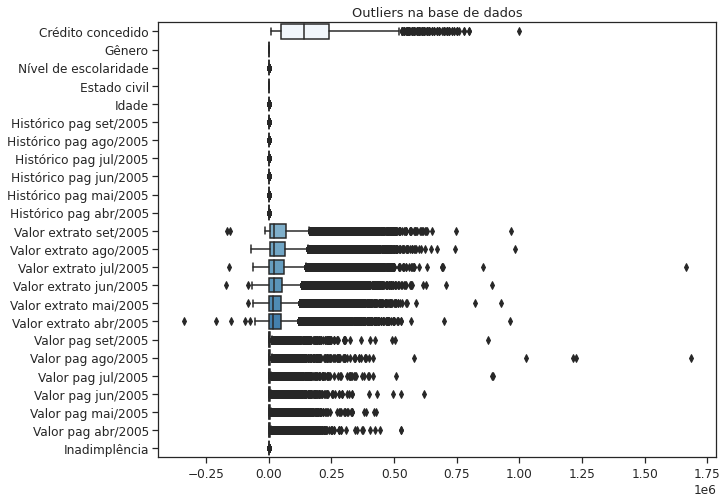

In [ ]:
plt.figure(figsize=(10,8))
sns.set_theme(style="ticks", font_scale=1.1)
sns.boxplot(data=df, orient='h', palette='Blues')
plt.title('Outliers na base de dados', size=13)

plt.show()

##Análise e Exploração dos Dados

Estatística descritiva

In [ ]:
df.describe()

,Crédito concedido,Gênero,Nível de escolaridade,Estado civil,Idade,Histórico pag set/2005,Histórico pag ago/2005,Histórico pag jul/2005,Histórico pag jun/2005,Histórico pag mai/2005,...,Valor extrato jun/2005,Valor extrato mai/2005,Valor extrato abr/2005,Valor pag set/2005,Valor pag ago/2005,Valor pag jul/2005,Valor pag jun/2005,Valor pag mai/2005,Valor pag abr/2005,Inadimplência
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.842267,1.557267,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.744494,0.521405,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Qual a distribuição de inadimplentes no banco de dados?

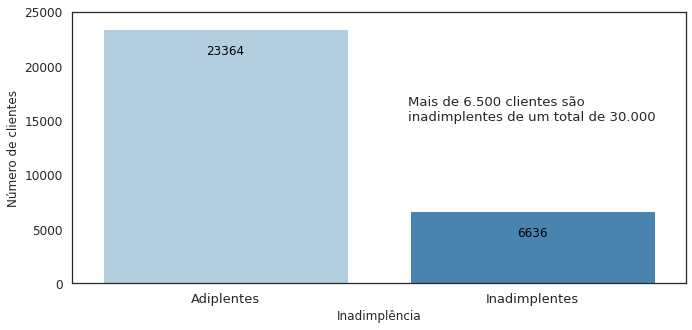

In [ ]:
plt.figure(figsize=(11,5))
sns.set_style("white")
ax = sns.countplot(data=df, x='Inadimplência', palette='Blues')

ax.set_xlabel('Inadimplência', fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=12)

plt.ylim(0,25000)
plt.annotate('Mais de 6.500 clientes são \ninadimplentes de um total de 30.000', xy=(0.595, 15000))
plt.xticks([0,1],['Adiplentes', 'Inadimplentes'], fontsize=13); plt.ylabel('Número de clientes', fontsize=12)

plt.show()

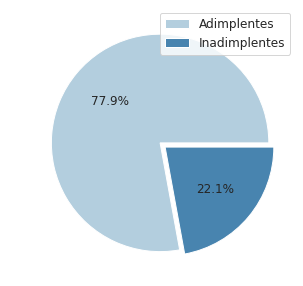

In [ ]:
plt.figure(figsize=(5,5))

df['Inadimplência'].value_counts().plot(kind='pie', labels=['',''], 
                                        autopct='%1.1f%%', colors=['#B3CEDE','#4884AF'], 
                                        explode=[0,0.06], textprops={"fontsize":12})

plt.ylabel(' ')
plt.legend(labels=['Adimplentes','Inadimplentes'])

plt.show()

Qual a distribuição de gênero dos inadimplentes?

In [ ]:
df['Inadimplência'].groupby(df['Gênero']).value_counts(normalize=True) 

Gênero  Inadimplência
1       0                0.758328
        1                0.241672
2       0                0.792237
        1                0.207763
Name: Inadimplência, dtype: float64

In [ ]:
colors = ['#B3CEDE', '#4884AF']
clientes = ['Adimplentes', 'Inadimplentes']
counter = df['Inadimplência'].groupby(df['Gênero']).value_counts().unstack()
p_dist = 100 * counter.divide(counter.sum(axis = 1), axis=0)

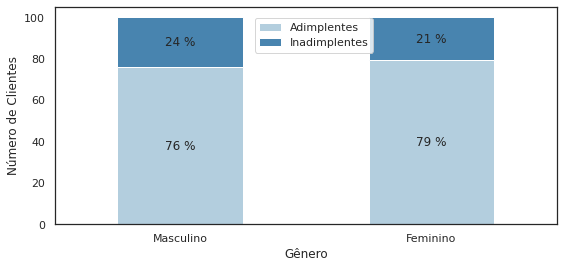

In [ ]:
sns.set(rc={'figure.figsize':(9,4)})
sns.set_style("white")

ax = p_dist.plot.bar(stacked=True, color=colors)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.0f} %'.format(height), horizontalalignment='center', verticalalignment='center')

plt.legend(clientes, loc=(0.398, 0.79), fontsize = 11)   
plt.xticks([0,1],['Masculino','Feminino'], rotation='horizontal'); plt.ylabel('Número de Clientes', fontsize = 12)

plt.show()

Qual a distribuição de idade dos inadimplentes e adimplentes?

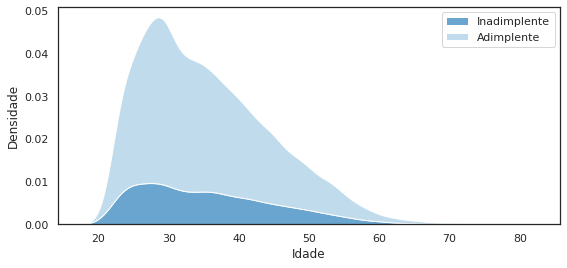

In [ ]:
plt.figure(figsize=(9,4))
sns.kdeplot(data=df, x="Idade", hue="Inadimplência", multiple="stack", palette='Blues')

plt.legend(loc='upper right', labels=['Inadimplente', 'Adimplente'])
plt.ylabel("Densidade", fontsize= 12)

plt.show()

Qual a distribuição de escolaridade dos clientes?


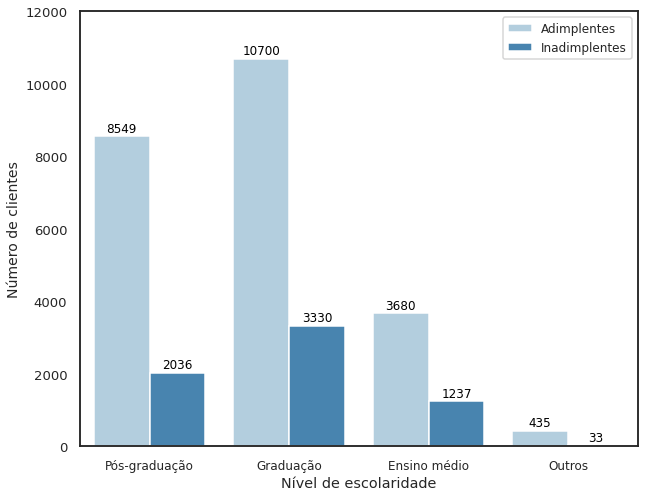

In [ ]:
plt.figure(figsize=(10,8))
sns.set_context("talk", font_scale=0.8)

ax = sns.countplot(data=df, x='Nível de escolaridade', hue='Inadimplência', palette='Blues')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+800), ha='center', va='top', color='black', size=12)

plt.ylim(0,12000)
plt.xticks([0,1,2,3], ['Pós-graduação', 'Graduação', 'Ensino médio', 'Outros'], fontsize=12);plt.ylabel('Número de clientes', fontsize = 14)
plt.legend(labels=['Adimplentes','Inadimplentes'], fontsize=12)

plt.show()

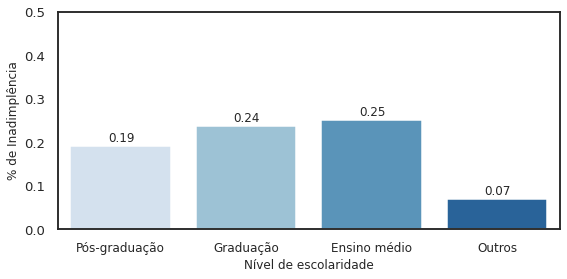

In [ ]:
plt.figure(figsize=(9,4))
sns.set_style("white")

ax = sns.barplot(x="Nível de escolaridade", y="Inadimplência", data=df, palette='Blues', ci=None)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.01), size=12)

plt.ylabel("% de Inadimplência", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Pós-graduação', 'Graduação', 'Ensino médio', 'Outros'], fontsize = 12); plt.xlabel('Nível de escolaridade', fontsize = 12)

plt.show()

Qual a distribuição do estado civil dos clientes?


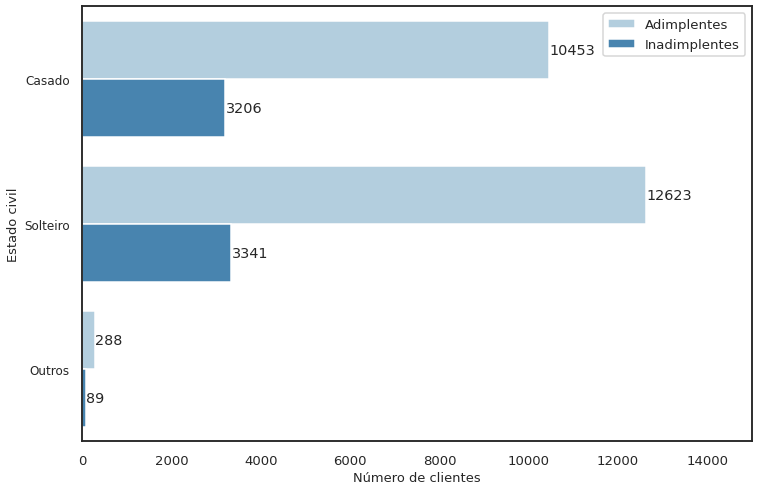

In [ ]:
plt.figure(figsize=(12,8))
sns.set_style("white")

ax = sns.countplot(data=df, y='Estado civil', hue='Inadimplência', palette='Blues')

for p in ax.patches:
  height = p.get_height()
  width = p.get_width()
  ax.text(x=width+3,
  y = p.get_y()+(height/2),
  s = '{:.0f}'.format(width),
  va = 'center')

plt.xlim(0,15000)
plt.ylabel("Estado civil", fontsize=13)
plt.yticks([0,1,2],['Casado','Solteiro','Outros'], fontsize=12);plt.xlabel('Número de clientes', fontsize=13)
plt.legend(labels=['Adimplentes','Inadimplentes'])

plt.show()

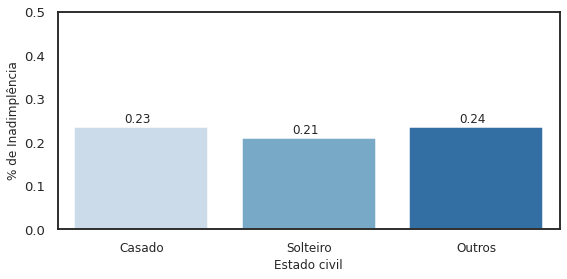

In [ ]:
plt.figure(figsize=(9,4))
sns.set_style("white")

ax = sns.barplot(x="Estado civil", y="Inadimplência", data=df, palette='Blues', ci=None)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.01), size=12)

plt.ylabel("% de Inadimplência", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2], ['Casado','Solteiro','Outros'], fontsize = 12); plt.xlabel('Estado civil', fontsize=12)

plt.show()

Variáveis mais fortes preditoras de inadimplência 
`Matriz de correlação (Spearman)`

In [ ]:
import numpy as np

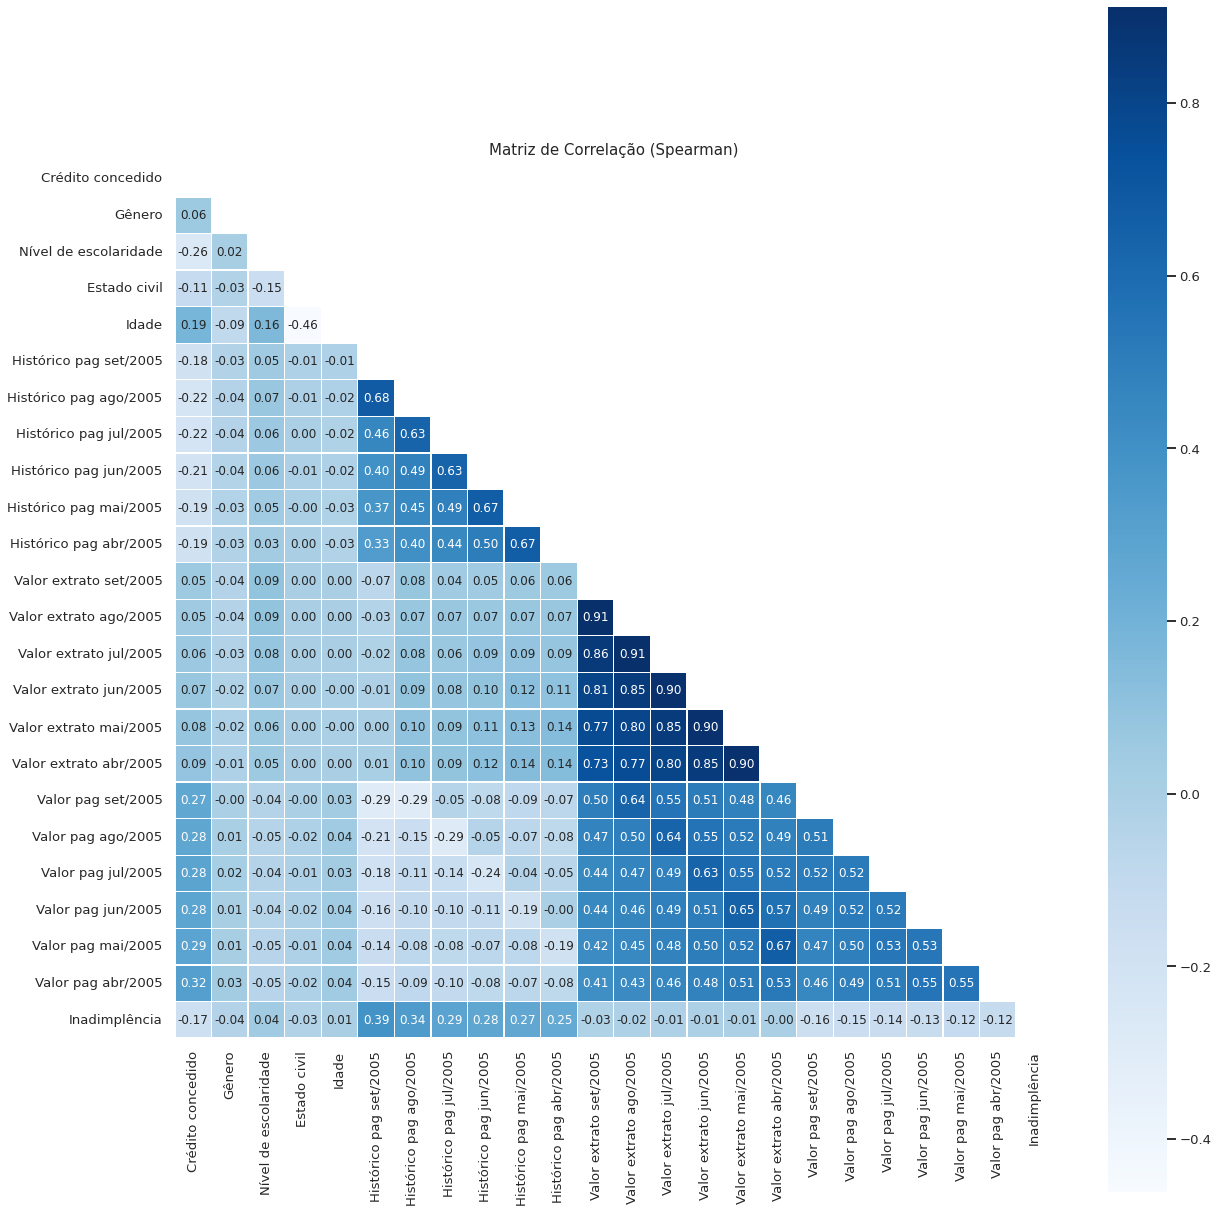

In [ ]:
corr = df.corr(method='spearman') 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

with sns.axes_style("white"):
    plt.subplots(figsize=(18, 18))
    sns.heatmap(corr, mask=mask, square=True, linewidths=.3, fmt='.2f', cmap="Blues", annot=True, annot_kws={"size": 12})
plt.title('Matriz de Correlação (Spearman)', size=15)

plt.tight_layout()
images_dir = '/content/drive/MyDrive/Inadimplencia_cartao'
plt.savefig(f"{images_dir}/fig11.png", dpi=300)

plt.show()

In [ ]:
df.corr(method='spearman').abs()['Inadimplência'].sort_values(ascending=False)


Inadimplência             1.000000
Histórico pag set/2005    0.391160
Histórico pag ago/2005    0.338456
Histórico pag jul/2005    0.294262
Histórico pag jun/2005    0.276443
Histórico pag mai/2005    0.267795
Histórico pag abr/2005    0.247234
Crédito concedido         0.169586
Valor pag set/2005        0.160493
Valor pag ago/2005        0.150977
Valor pag jul/2005        0.139388
Valor pag jun/2005        0.127979
Valor pag abr/2005        0.121444
Valor pag mai/2005        0.116587
Nível de escolaridade     0.043425
Gênero                    0.039961
Estado civil              0.028698
Valor extrato set/2005    0.025327
Valor extrato ago/2005    0.015554
Valor extrato jul/2005    0.012670
Valor extrato jun/2005    0.008357
Valor extrato mai/2005    0.006851
Idade                     0.005149
Valor extrato abr/2005    0.000076
Name: Inadimplência, dtype: float64

Normalização das variáveis

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for column in df.columns:
    df[column] = scaler.fit_transform(np.array(df[column]).reshape(-1,1))

In [ ]:
df.describe()

,Crédito concedido,Gênero,Nível de escolaridade,Estado civil,Idade,Histórico pag set/2005,Histórico pag ago/2005,Histórico pag jul/2005,Histórico pag jun/2005,Histórico pag mai/2005,...,Valor extrato jun/2005,Valor extrato mai/2005,Valor extrato abr/2005,Valor pag set/2005,Valor pag ago/2005,Valor pag jul/2005,Valor pag jun/2005,Valor pag mai/2005,Valor pag abr/2005,Inadimplência
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.159075,0.603733,0.280756,0.278633,0.249750,0.044596,0.040004,0.038008,0.032346,0.027688,...,0.200891,0.120620,0.290851,0.006483,0.003516,0.005832,0.007771,0.011252,0.009865,0.221200
std,0.131058,0.489129,0.248165,0.260702,0.158929,0.095074,0.100216,0.098824,0.095139,0.089715,...,0.060601,0.060284,0.045766,0.018961,0.013680,0.019650,0.025227,0.035820,0.033627,0.415062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040404,0.000000,0.000000,0.000000,0.120690,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.162330,0.082396,0.261944,0.001145,0.000495,0.000435,0.000477,0.000592,0.000223,0.000000
50%,0.131313,1.000000,0.333333,0.500000,0.224138,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.178084,0.098600,0.274097,0.002404,0.001193,0.002009,0.002415,0.003517,0.002837,0.000000
75%,0.232323,1.000000,0.333333,0.500000,0.344828,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.211482,0.130415,0.298787,0.005731,0.002969,0.005028,0.006463,0.009452,0.007566,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **PARTE C**

####Separar dados de treino e teste

In [ ]:
Y = df['Inadimplência']  # select target 
X = df[df.columns.difference(['Inadimplência'])]  # select features

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

####Modelos de Classificação

DecisionTree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=123)
dtc.fit(X_train, y_train)
pred_1=dtc.predict(X_test)

from sklearn import metrics
accur_1 = metrics.accuracy_score(y_test, pred_1)
prec_1 = metrics.precision_score(y_test, pred_1)
recc_1 = metrics.recall_score(y_test, pred_1)
f_1 = metrics.f1_score(y_test, pred_1)

list_models = []
list_accur = []
list_prec = []
list_recc = []
list_f1 = []

list_models.append('DecisionTree')
list_accur.append(accur_1)
list_prec.append(prec_1)
list_recc.append(recc_1)
list_f1.append(f_1)


In [ ]:
accur_1, prec_1, f_1

(0.7203333333333334, 0.37049861495844877, 0.38937409024745273)

RandomForest Classifier



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=123)
rfc.fit(X_train, y_train)
pred_2 = rfc.predict(X_test)

accur_2 = metrics.accuracy_score(y_test, pred_2)
prec_2 = metrics.precision_score(y_test, pred_2)
recc_2 = metrics.recall_score(y_test, pred_2)
f_2 = metrics.f1_score(y_test, pred_2)
list_models.append('RandomForest')
list_accur.append(accur_2)
list_prec.append(prec_2)
list_recc.append(recc_2)
list_f1.append(f_2)

In [ ]:
accur_2, prec_2, f_2

(0.8176666666666667, 0.6325757575757576, 0.4780534351145038)

AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(random_state=123)
adb.fit(X_train, y_train)
pred_3 = adb.predict(X_test)  

accur_3 = metrics.accuracy_score(y_test, pred_3)
prec_3 = metrics.precision_score(y_test, pred_3)
recc_3 = metrics.recall_score(y_test, pred_3)
f_3 = metrics.f1_score(y_test, pred_3)
list_models.append('AdaBoost')
list_accur.append(accur_3)
list_prec.append(prec_3)
list_recc.append(recc_3)
list_f1.append(f_3)

In [ ]:
accur_3, prec_3, f_3

(0.8178333333333333, 0.6698872785829307, 0.43220779220779215)

GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gau = GaussianNB()
gau.fit(X_train, y_train)
pred_4 = gau.predict(X_test)

accur_4 = metrics.accuracy_score(y_test, pred_4)
prec_4 = metrics.precision_score(y_test, pred_4)
recc_4 = metrics.recall_score(y_test, pred_4)
f_4 = metrics.f1_score(y_test, pred_4)
list_models.append('GaussianNB')
list_accur.append(accur_4)
list_prec.append(prec_4)
list_recc.append(recc_4)
list_f1.append(f_4)

In [ ]:
accur_4, prec_4, f_4

(0.7595, 0.4569659442724458, 0.5056526207605344)

Métricas - Comparação dos modelos

Acurácia

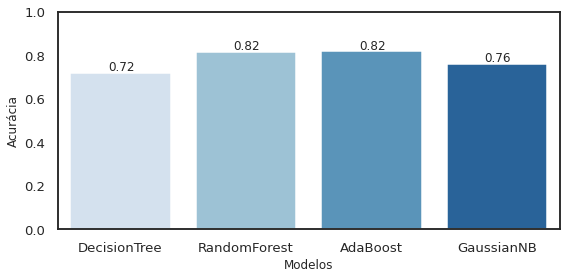

In [ ]:
plt.figure(figsize=(9,4))
sns.set_style("white")

ax = sns.barplot(x=list_models, y=list_accur, palette='Blues', ci=None)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.01), size=12)

plt.xlabel('Modelos', fontsize= 12)
plt.ylim(0, 1.0)
plt.ylabel('Acurácia', fontsize= 12)
plt.show()

Precisão

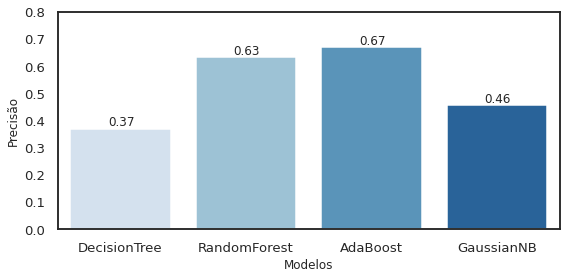

In [ ]:
plt.figure(figsize=(9,4))
sns.set_style("white")

ax = sns.barplot(x=list_models, y=list_prec, palette='Blues', ci=None)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.01), size=12)

plt.xlabel('Modelos', fontsize= 12)
plt.ylim(0, 0.8)
plt.ylabel('Precisão', fontsize= 12)
plt.show()

Recall

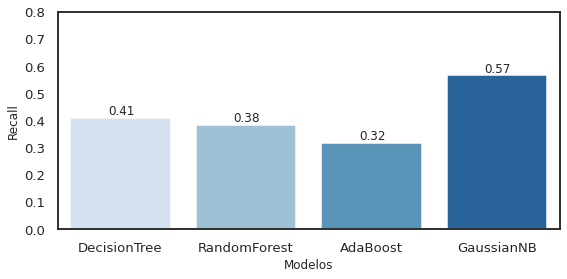

In [ ]:
plt.figure(figsize=(9,4))
sns.set_style("white")

ax = sns.barplot(x=list_models, y=list_recc, palette='Blues', ci=None)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.01), size=12)

plt.xlabel('Modelos', fontsize= 12)
plt.ylim(0, 0.8)
plt.ylabel('Recall', fontsize= 12)
plt.show()

f1

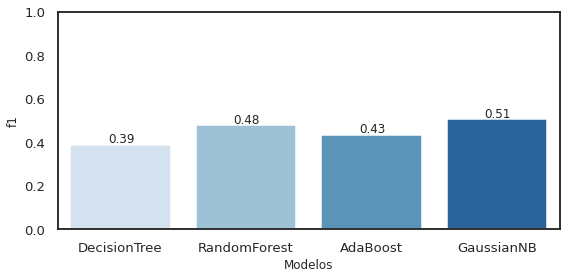

In [ ]:
plt.figure(figsize=(9,4))
sns.set_style("white")

ax = sns.barplot(x=list_models, y=list_f1, palette='Blues', ci=None)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.01), size=12)

plt.xlabel('Modelos', fontsize= 12)
plt.ylim(0, 1.0)
plt.ylabel('f1', fontsize= 12)
plt.show()

Matriz de confusão

[Text(0, 0.5, 'Não Pagou (0)'), Text(0, 1.5, 'Pagou (1)')]

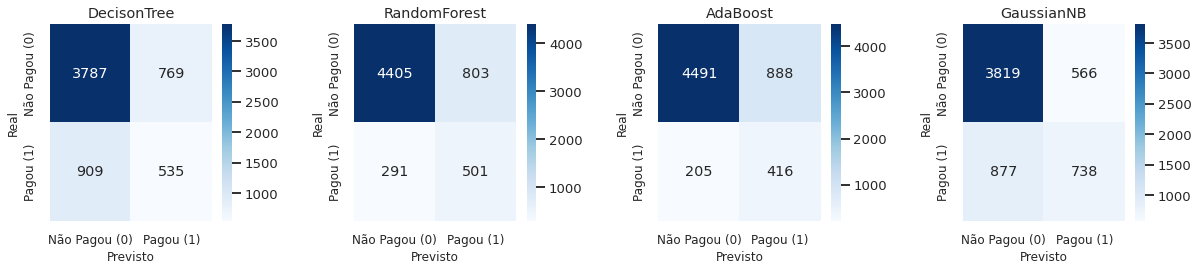

In [ ]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(20, 8))
plt.subplots_adjust(wspace=0.5)

ax1 = fig.add_subplot(241)
confMatrix = confusion_matrix(pred_1, y_test)
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Previsto', fontsize = 12)
plt.ylabel('Real', fontsize = 12)
plt.title('DecisonTree')
ax1.xaxis.set_ticklabels(['Não Pagou (0)', 'Pagou (1)'], fontsize = 12) 
ax1.yaxis.set_ticklabels(['Não Pagou (0)', 'Pagou (1)'], fontsize = 12)

ax2 = fig.add_subplot(242)
confMatrix = confusion_matrix(pred_2, y_test)
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Previsto', fontsize = 12)
plt.ylabel('Real', fontsize = 12)
plt.title('RandomForest')
ax2.xaxis.set_ticklabels(['Não Pagou (0)', 'Pagou (1)'], fontsize = 12) 
ax2.yaxis.set_ticklabels(['Não Pagou (0)', 'Pagou (1)'], fontsize = 12)

ax3 = fig.add_subplot(243)
confMatrix = confusion_matrix(pred_3, y_test)
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Previsto', fontsize = 12)
plt.ylabel('Real', fontsize = 12)
plt.title('AdaBoost')
ax3.xaxis.set_ticklabels(['Não Pagou (0)', 'Pagou (1)'], fontsize = 12) 
ax3.yaxis.set_ticklabels(['Não Pagou (0)', 'Pagou (1)'], fontsize = 12)

ax4 = fig.add_subplot(244)
confMatrix = confusion_matrix(pred_4, y_test)
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Previsto', fontsize = 12)
plt.ylabel('Real', fontsize = 12)
plt.title('GaussianNB')
ax4.xaxis.set_ticklabels(['Não Pagou (0)', 'Pagou (1)'], fontsize = 12) 
ax4.yaxis.set_ticklabels(['Não Pagou (0)', 'Pagou (1)'], fontsize = 12)